In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime 
import os 
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature

class split_filename:
    
    def __init__(self, filename):
        
        self.filename = filename
        args = self.filename.split('.')
        
        self._leo = args[0]
        self._year = int(args[1])
        self._doy = int(args[2])
        self._hour = int(args[3])
        self._minute = int(args[4])
        
        self._time = datetime.time(self._hour, self._minute, 0)    
        self._date = datetime.date(self._year, 1, 1) + datetime.timedelta(self._doy - 1)
        self._datetime = datetime.datetime.combine(self._date, self._time)
    
    @property
    def year(self):
        return self._year
    @property
    def doy(self):
        return self._doy
    @property
    def hour(self):
        return self._hour
    @property
    def minute(self):
        return self._minute
    @property
    def time(self):
        return self._time
    @property
    def date(self):
        return self._date
    @property
    def datetime(self):
        return self._datetime

#





In [317]:
dir_cdaac = "C:\\Users\\LuizF\\Downloads\\ionPrf_prov1_2022_015\\"
dir_tacc = "C:\\Users\\LuizF\\Downloads\\ionPrf_trops.2022.015\\"

_, _, files = next(os.walk(dir_tacc))

chuck = []

start_time = datetime.datetime(2022, 1, 15, 4, 0, 0)
end_time = datetime.datetime(2022, 1, 15, 13, 0, 0)

start_lat, end_lat = -50, -30
start_lon, end_lon = 160, 180

for filename in files:
    
    args = split_filename(filename)
    time_in_file = args.datetime
    
    if (time_in_file >= start_time) and (time_in_file <= end_time):
        
        ds = xr.open_dataset(dir_tacc + filename)


        lon = ds['GEO_lon'].values 
        lat = ds['GEO_lat'].values 

        if any(lon > start_lon) and any(lat < end_lat):
            chuck.append(filename)
            print(filename)



ionPrf_F702.2022.015.06.30.G24_0001.0001_nc
ionPrf_F703.2022.015.05.10.G08_0001.0001_nc
ionPrf_F703.2022.015.05.11.R05_0001.0001_nc
ionPrf_F703.2022.015.06.43.G01_0001.0001_nc
ionPrf_F703.2022.015.11.56.G31_0001.0001_nc
ionPrf_F705.2022.015.07.03.G22_0001.0001_nc
ionPrf_F705.2022.015.10.28.R17_0001.0001_nc
ionPrf_F705.2022.015.10.40.G25_0001.0001_nc
ionPrf_F705.2022.015.12.19.G31_0001.0001_nc
ionPrf_F706.2022.015.12.33.G11_0001.0001_nc


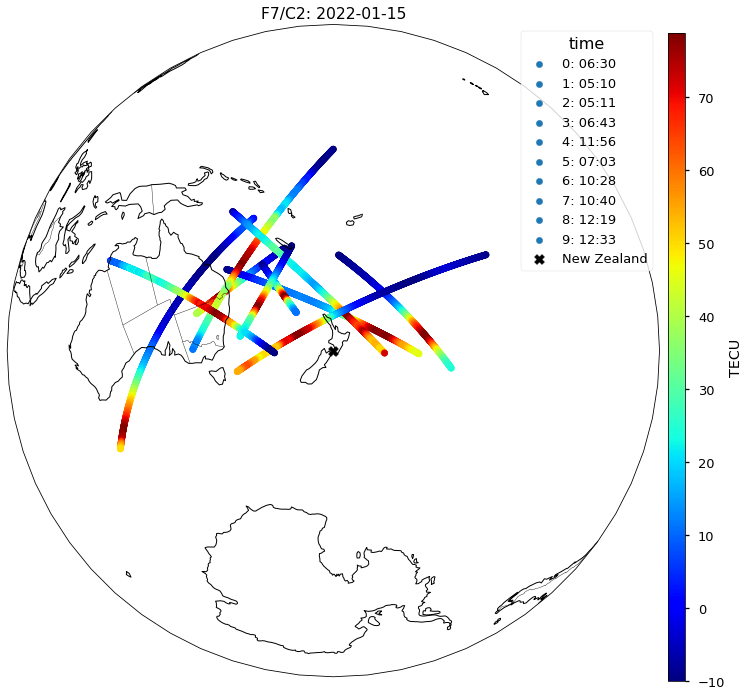

In [319]:
lat_point = -40.9006 
lon_point = 174.8860
name_point = "New Zealand"

fig, ax = plt.subplots(figsize = (12, 12), 
                       subplot_kw =dict(projection=ccrs.Orthographic(central_longitude = lon_point, 
                                                                     central_latitude = lat_point)))

plt.style.use('seaborn-talk')
ax.set_global()
states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='50m',
            facecolor='none')

ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw = 1) 
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

start_lat, end_lat =  -60, 10
start_lon, end_lon = -180, 180
step = 5

ax.set(title = f"F7/C2: {args.date}")


for num, filename in enumerate(chuck):
    
    args = split_filename(filename)
    time_in_file = args.datetime
    ds = xr.open_dataset(dir_tacc + filename)
        
    lat = ds['GEO_lat'].values
    lon = ds['GEO_lon'].values
    minlat, maxlat = min(lat), max(lat)
    minlon, maxlon = min(lon), max(lon)
    
    offset_x = ((minlon + maxlon) / 2) - 180
    offset_y = (minlat + maxlat) / 2
    
    time_file = str(split_filename(filename).time).replace(':00', '')
        
    img = ax.scatter(lon, lat, c = ds['TEC_cal'].values, 
                     s = 40, 
                     label = f"{num}: {time_file}", 
                         cmap = 'jet', transform = ccrs.PlateCarree())
        
    
   # ax.text(offset_x, offset_y, num, fontsize = 16, transform=ccrs.Geodetic())

cbar_ax = fig.add_axes([.9, 0.12, 0.02, 0.75]) 
fig.colorbar(img, cax=cbar_ax, label = 'TECU')

ax.scatter(lon_point, lat_point, s = 100, marker = 'X', color = 'k', 
           transform = ccrs.PlateCarree(), label = name_point)


ax.legend(title = "time")
plt.show()

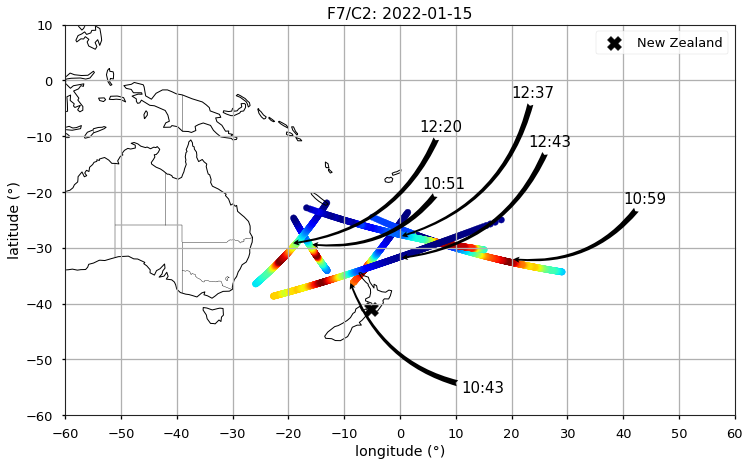

In [287]:

cm = 180
fig, ax = plt.subplots(figsize = (12, 12), 
                       subplot_kw =dict(projection= ccrs.PlateCarree(cm)))

plt.style.use('seaborn-talk')
ax.set_global()
states_provinces = cfeature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces_lines',
            scale='50m',
            facecolor='none')

ax.add_feature(cfeature.COASTLINE, edgecolor='black', lw = 1) 
ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='black')
ax.add_feature(states_provinces, edgecolor='black')

start_lat, end_lat =  -60, 10
start_lon, end_lon =-60, 60
step = 10

ax.set(xticks = np.arange(start_lon, end_lon + step, step),
       yticks = np.arange(start_lat, end_lat + step, step),
       xlabel = 'longitude (°)', 
       ylabel = 'latitude (°)',
       title = f"F7/C2: {args.date}")

ax.set_extent([start_lon + cm, end_lon + cm, 
               start_lat, end_lat], crs=ccrs.PlateCarree())

ax.grid()

def plot(ax, filename, directory, dx, dy, offset_x = None, offset_y = None):
    
    ds = xr.open_dataset(directory + filename)

    lat = ds['GEO_lat'].values
    lon = ds['GEO_lon'].values
    minlat, maxlat = min(lat), max(lat)
    minlon, maxlon = min(lon), max(lon)
    
    if offset_x == None:
        offset_x = ((minlon + maxlon) / 2) - 180
    if offset_y== None:
        offset_y = (minlat + maxlat) / 2

    img = ax.scatter(lon, lat,c = ds['TEC_cal'].values, s = 40, 
                     cmap = 'jet', transform = ccrs.PlateCarree())

    time_file = str(split_filename(filename).time).replace(':00', '')

    ax.annotate(time_file, xy=(offset_x, offset_y), xytext=(offset_x + dx, offset_y + dy),
                xycoords='data', size=15,
                arrowprops=dict(facecolor='black', ec = 'none',
                                arrowstyle="fancy",
                                connectionstyle="arc3,rad=-0.3"))
    

plot(ax, chuck[2], directory, 20, -20, offset_x = -9, offset_y = -36)
plot(ax, chuck[3], directory, 20, 10)
plot(ax, chuck[4], directory, 20, 10, offset_x = 20, offset_y = -32)
plot(ax, chuck[5], directory, 23, 20)
plot(ax, chuck[6], directory, 20, 25, offset_x = 0, offset_y = -28)
plot(ax, chuck[7], directory, 23, 20, offset_x = 0)


ax.scatter(lon_point, lat_point, s = 200, marker = 'X', color = 'k', 
           transform = ccrs.PlateCarree(), label = name_point)

ax.legend()

plt.show()

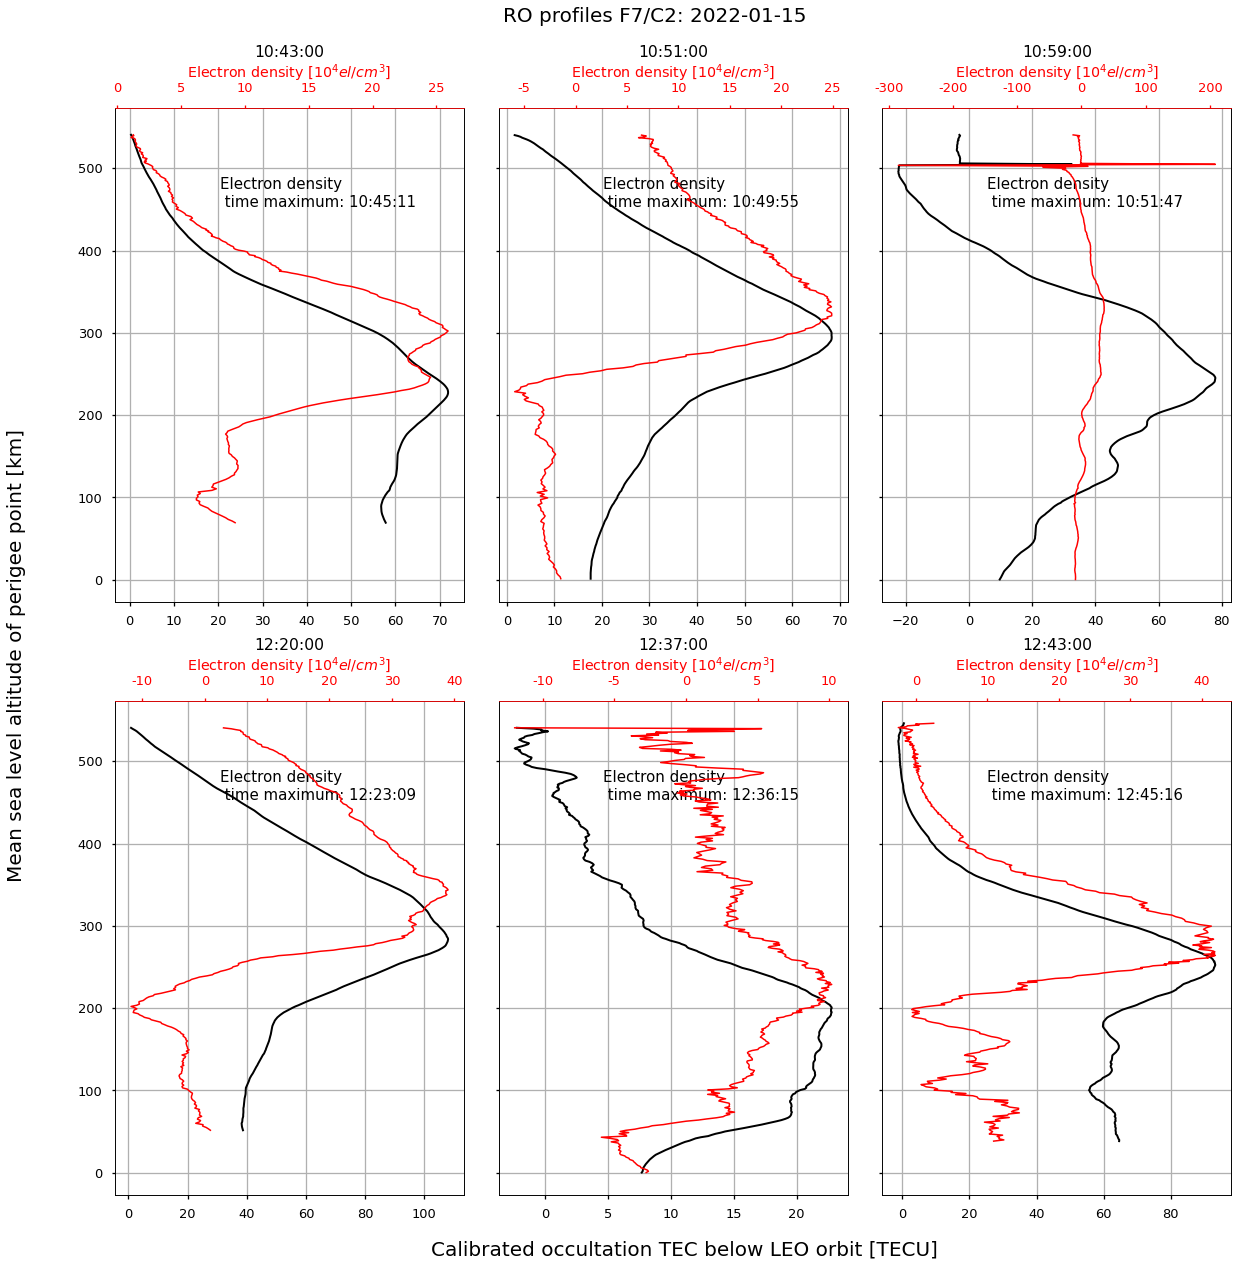

In [315]:


import matplotlib.ticker as mtick


def plot_set(ax, directory, filename):
    
    ds = xr.open_dataset(directory + filename)

    ax1 = ax.twiny() 

    ds['TEC_cal'].plot(ax = ax, y = 'MSL_alt', lw = 2, 
                       color = 'black', label = 'TEC (TECU)')


    ds['ELEC_dens'].plot(ax = ax1, y = 'MSL_alt', color = 'red',  
                         lw = 1.5,)

    scale_x = 1e4
    ticks_x = mtick.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
    ax1.xaxis.set_major_formatter(ticks_x)
    ax1.spines['top'].set_color('red') 
    ax1.tick_params(axis='x', colors='red')
    ax1.xaxis.label.set_color('red')                              

    ax1.set(xlabel = 'Electron density [$10^4 el/cm^3$]')
    ax.grid()

    attrs = ds.attrs
    edmaxtime = datetime.time(int(attrs['hour']), int(attrs['minute']), int(attrs['second'])) 
    tend = split_filename(filename).time

    parameters = f"Electron density \n time maximum: {edmaxtime}"

    ax.text(0.3, 0.8, parameters, fontsize = 15, transform = ax.transAxes)

    ax.set(xlabel = '', ylabel = '', title = tend)

fig, axs = plt.subplots(figsize = (20, 20), ncols = 3, nrows = 2, sharey = True)
plt.subplots_adjust(wspace = 0.1)
for ax, num in zip(axs.flat, range(2, 8)):
    
    plot_set(ax, directory, chuck[num])
    
    
fig.text(0.52, 0.08, 'Calibrated occultation TEC below LEO orbit [TECU]', va = 'bottom', ha='center', fontsize = 20)
fig.text(0.05, 0.5, 'Mean sea level altitude of perigee point [km]', va='center', rotation='vertical', fontsize = 20)   
fig.suptitle(f'RO profiles F7/C2: {args.date}', y = 0.95, fontsize = 20)

plt.rcParams.update({'font.size': 16})    
plt.show()